In [8]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import  seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

Q1.1.1

In [11]:
df = pd.read_csv('Pottery.csv')
df

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,6,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,7,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,8,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,9,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,10,Llanedyrn,13.4,6.92,7.23,0.28,0.20


In [12]:
print(df.shape)

(26, 7)


THe data has 7 columns as shown above. The columns we want to use in PCA is the five from the left, which are Al, Fe, Mg, Ca and Na.

Q1.1.2

In [13]:
# we want to drop the columns that we don't use for PCA
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.set_index('Site', inplace=True)
df

,Al,Fe,Mg,Ca,Na
Site,,,,,
Llanedyrn,14.4,7.00,4.30,0.15,0.51
Llanedyrn,13.8,7.08,3.43,0.12,0.17
Llanedyrn,14.6,7.09,3.88,0.13,0.20
Llanedyrn,11.5,6.37,5.64,0.16,0.14
Llanedyrn,13.8,7.06,5.34,0.20,0.20
Llanedyrn,10.9,6.26,3.47,0.17,0.22
Llanedyrn,10.1,4.26,4.26,0.20,0.18
Llanedyrn,11.6,5.78,5.91,0.18,0.16
Llanedyrn,11.1,5.49,4.52,0.29,0.30


In [15]:
scaler = StandardScaler()
potery_scaled = scaler.fit_transform(df)
potery_scaled

array([[-0.03145568,  1.07166989,  0.54199637,  0.03487194,  2.64999905],
       [-0.23591756,  1.1055258 ,  0.13495926, -0.26735151,  0.08698028],
       [ 0.03669829,  1.10975779,  0.3454957 , -0.16661036,  0.31312899],
       [-1.01968814,  0.80505457,  1.1689271 ,  0.13561308, -0.13916844],
       [-0.23591756,  1.09706182,  1.02856948,  0.53857767,  0.31312899],
       [-1.22415003,  0.75850268,  0.15367361,  0.23635423,  0.4638948 ],
       [-1.49676588, -0.08789516,  0.52328202,  0.53857767,  0.16236318],
       [-0.98561116,  0.5553672 ,  1.29524897,  0.33709538,  0.01159737],
       [-1.15599607,  0.43263951,  0.6449253 ,  1.44524799,  1.06695804],
       [-0.37222549,  1.03781397,  1.91282252,  1.34450685,  0.31312899],
       [-0.71299531,  0.70348682,  1.19232004,  0.74005996,  2.87614776],
       [-0.47445644,  0.91931828,  1.10810547,  1.64673029,  0.61466061],
       [-0.61076436,  0.94047822,  0.61217519,  0.53857767,  0.4638948 ],
       [-0.67891832,  0.83467849,  0.3

In [17]:
pca = PCA(n_components=3, svd_solver='full')
pca_scores = pca.fit_transform(potery_scaled)
pca_scores.shape

(26, 3)

In [19]:
scores_pd = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2', 'PC3']
                         ,index = df.index)

In [20]:
scores_pd

,PC1,PC2,PC3
Site,,,
Llanedyrn,-1.778026,2.289445,-0.075289
Llanedyrn,-0.611193,0.122065,-0.499044
Llanedyrn,-0.722428,0.370209,-0.207550
Llanedyrn,-1.417696,-0.555600,-0.557590
Llanedyrn,-1.486801,-0.004081,0.195248
Llanedyrn,-1.259044,-0.092347,-0.783259
Llanedyrn,-1.180703,-0.607921,-0.575010
Llanedyrn,-1.490385,-0.498745,-0.336582
Llanedyrn,-2.076010,0.000500,0.220714


In [33]:
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3']
                           ,index = df.columns)

In [34]:
loadings_pd

,PC1,PC2,PC3
Al,0.445434,0.356524,0.694985
Fe,-0.478132,0.041175,-0.157338
Mg,-0.486541,-0.049607,0.158560
Ca,-0.449054,-0.344146,0.683443
Na,-0.366888,0.866197,0.002043


convert standardized data into 3 PCs, as shown in the dataframe(dimension 26*3)

Q1.1.3

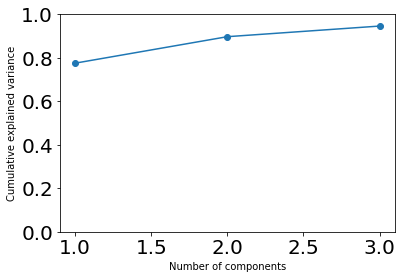

In [30]:
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.tick_params(labelsize=20)
plt.ylim(0,1)
plt.show()

In [32]:
np.cumsum(pca.explained_variance_ratio_)

array([0.7755594 , 0.89732137, 0.9461598 ])

From above, the first component explained 77.6% of the model variace. 

First two components explained variance add up to about 90%.

First three components explained about 94.6% of variance.

Q1.1.4

In [66]:
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):
        if (label == 'Llanedyrn'):
            plt.text(x, y, label, ha='center', size=11,color = 'r')
        elif (label == 'Caldicot'):
            plt.text(x, y, label, ha='center', size=11,color = 'g')
        elif (label == 'IsleThorns'):
            plt.text(x, y, label, ha='center', size=11,color = 'b')
        else:
            plt.text(x, y, label, ha='center', size=11,color = 'y')
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

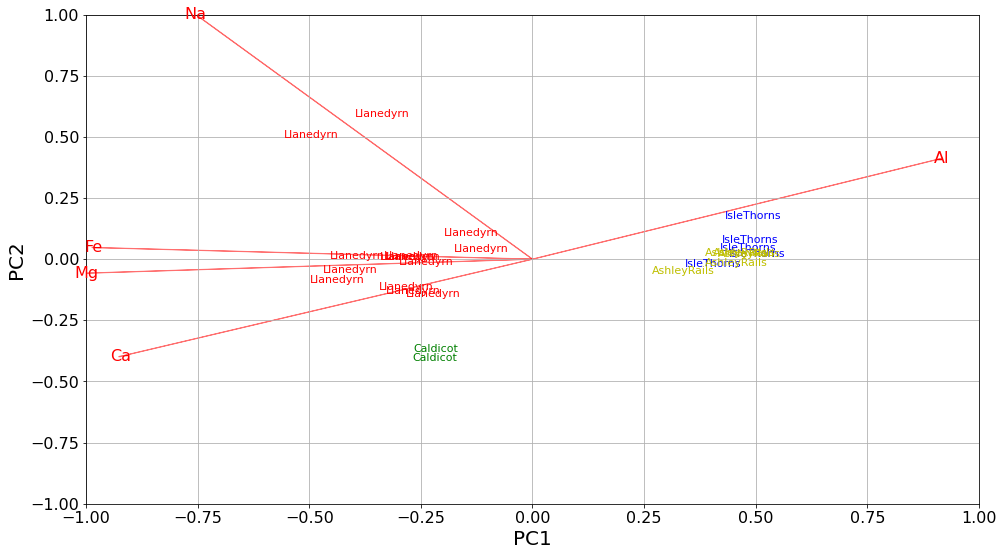

In [69]:
plt.rcParams["figure.figsize"] = [16,9]
myplot(pca_scores[:,:2],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=scores_pd.index)
plt.show()

Here we use different color for different sites in our score-loading graph PC1-PC2. Red for Llanedyrn, Blue for IsleThorns, Yellow for AshleyRails and green for new material Caldicot.

Q1.1.5

As observed from the map above, the plot for materials of IsleThorns(Blue) and AshleyRails(Yellow) are very closed to each other. In other words, there are evidents that IsleThorns and AshleyRails has similar composition of our five metals. In this case, IsleThorns and AshleyRails has higher (Al) and lower (Fe, Mg, Ca) than Llanedyrn and Caldicot.

Therefore, it is reasonable that IsleThorns and AshleyRails are used to produce B, because they have similar chemical composition.

Q1.1.6

No.
In this case, the centre of Caldicot is not closed to centre of Llanedyrn.

We can observe that Llanedyrn and Caldicot has similar level on Ca, Mg and Fe, but they are different on the composition of Na. Llanedyrn has higher level of Na than Caldicot.

Q1.1.7

The biggest difference between cluster of (Caldicot,Llanedyrn) and (IsleThorns, AshleyRails) is in the level of composition of Ca, Mg and Fe and Al. As we can see from the graph, (Caldicot,Llanedyrn) has higher level of Ca, Mg and Fe, while (IsleThorns, AshleyRails) has higher level of Al.

Sample of Caldicot and Llanedyrn are different from their level of composition in Na. Llanedyrn tends to have high level of Na, but Caldicot tends to have much lower level on Na, we can get this information by drawing a vertical line from point to the red line of Na.

Q1.1.8

In [83]:
df.index

Index(['Llanedyrn', 'Llanedyrn', 'Llanedyrn', 'Llanedyrn', 'Llanedyrn',
       'Llanedyrn', 'Llanedyrn', 'Llanedyrn', 'Llanedyrn', 'Llanedyrn',
       'Llanedyrn', 'Llanedyrn', 'Llanedyrn', 'Llanedyrn', 'Caldicot',
       'Caldicot', 'IsleThorns', 'IsleThorns', 'IsleThorns', 'IsleThorns',
       'IsleThorns', 'AshleyRails', 'AshleyRails', 'AshleyRails',
       'AshleyRails', 'AshleyRails'],
      dtype='object', name='Site')

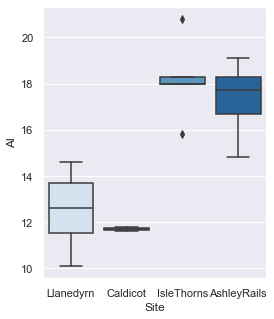

In [84]:
#sns.boxplot(data = df)
sns.set(rc={'figure.figsize':(4,5)})
sns.boxplot(x=df.index, y=df["Al"], palette="Blues");
plt.show()

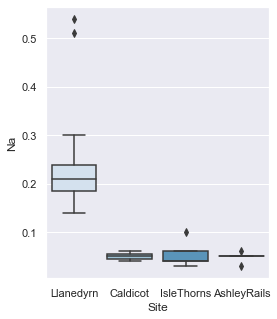

In [85]:
sns.set(rc={'figure.figsize':(4,5)})
sns.boxplot(x=df.index, y=df["Na"], palette="Blues");

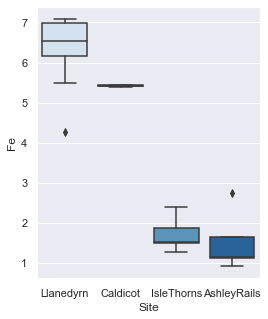

In [86]:
sns.set(rc={'figure.figsize':(4,5)})
sns.boxplot(x=df.index, y=df["Fe"], palette="Blues");

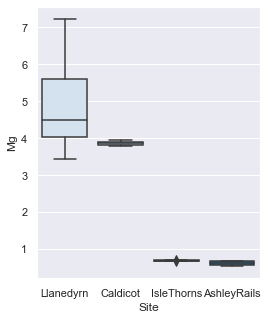

In [87]:
sns.set(rc={'figure.figsize':(4,5)})
sns.boxplot(x=df.index, y=df["Mg"], palette="Blues");

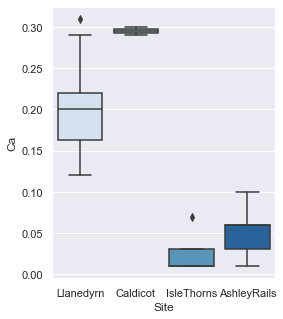

In [88]:
sns.set(rc={'figure.figsize':(4,5)})
sns.boxplot(x=df.index, y=df["Ca"], palette="Blues");

The above graghs can confirm our answers in previous part.

From the first graph of Al, (IsleThorns, AshleyRails) has higher average level of Al than (Caldicot,Llanedyrn), which is consistent with 1.1.7.

From the last three gragh of Ca, Mg, Fe, (Caldicot,Llanedyrn) has higher average level of Ca, Mg and Fe than (IsleThorns, AshleyRails), which is consistent with 1.1.7.

From the second gragh of Na, the box of Caldicot is sighnificantly lower than box for Llanedyrn, which indicates Caldicot is not a good replacement of Llanedyrn.